In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
all_reviews = pd.read_pickle("filtered_Yelp_reviews.pkl")
build_features = pd.read_csv("build_features.csv")

# convert to lowercase
all_reviews["text"] = all_reviews["text"].str.lower()
    
# add spaces and remove "*"
for feature in build_features:
    for i in range(len(build_features[feature].dropna())):
        build_features[feature][i] = " " + build_features[feature][i]
        if "*" in build_features[feature][i]:
            build_features[feature][i] = build_features[feature][i].replace("*", "")
        else:
            build_features[feature][i] = build_features[feature][i] + " "

In [61]:
# create dict of BF words to number of occurrences
n_occ = {}
for feature in build_features:
    for term in build_features[feature].dropna():
        n_occ[term] = all_reviews.text.str.contains(term).sum()

In [82]:
c = Counter(n_occ).most_common(30)
for item in c:
    print(item[0], item[1])

 quiet 645
 cool 595
 feel  515
 comf 512
 clean  412
 musi 407
 hot  399
 light 396
 old  375
 smooth 366
 cold 272
 hard  267
 vibe 262
 smell 261
 grab 257
 warm 252
 loud 246
 cold  230
 fun  226
 green 202
 felt  192
 cozy  188
 modern  186
 decor  166
 sound 153
 ambian 150
 bright 140
 soft 140
 glass  138
 temp 134


In [79]:
key_words = []
for item in c:
    key_words.append(item[0])

is_present = np.zeros((len(key_words), len(all_reviews)))
for term_idx in range(len(key_words)):
    for review_idx in range(len(all_reviews)):
        if key_words[term_idx] in all_reviews.text[review_idx]:
            is_present[term_idx, review_idx] = 1
            
# multiple occurrence matrix by its transpose to get co-occurrences
co_occ = np.dot(is_present, is_present.T)

645.0

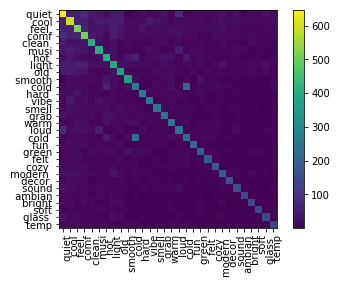

In [81]:
fig, ax = plt.subplots()
#im = ax.imshow(co_occ)

# We want to show all ticks...
ax.set_xticks(np.arange(len(key_words)))
ax.set_yticks(np.arange(len(key_words)))

# ... and label them with the respective list entries
ax.set_xticklabels(key_words)
ax.set_yticklabels(key_words)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")

plt.imshow(co_occ)
plt.colorbar()
plt.show()